### Base Learner 10  - Use BW Images

In [1]:
from fastai2.vision.all import *
import sys, torch
sys.path.append('..')

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


# %load_ext autoreload
# %autoreload 2

from modules.expbuilder import default_params, run_exp, rm_test_recorder
from modules.trainutils import piece_class_parse

train_path = Path('../../../rf-chess-data/cropped_v1/')
train_clean_path = Path('../../../rf-chess-data/cropped_v1.1/')

test_path_all = Path('../../../other-chess-data/regulation-test-2-all/')
test_path_easy = Path('../../../other-chess-data/regulation-test-2-easy/')

In [2]:
def my_weight_func(it_path):
    return 3 if 'queen' in it_path.name else 1

In [3]:
def mypcp(x):
    return piece_class_parse(x.name)

In [4]:
Augs = aug_transforms(mult=1.,)

In [5]:
dblock = DataBlock(
            (ImageBlock(PILImageBW),CategoryBlock),
            get_items=get_image_files,
            get_y=mypcp,
            item_tfms=[Resize(128)],
            batch_tfms=Augs,
            )

dl = dblock.dataloaders(train_path)

In [6]:
learn = cnn_learner(dl, resnet50, metrics=accuracy)

In [7]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.821886,0.303802,0.928571,00:10


In [16]:
from modules.trainutils import my_test_metrics

In [17]:
my_test_metrics(learn, test_path_all)

(2.440389116605123, 0.39473684210526316)

In [18]:
my_test_metrics(learn, test_path_easy)

(2.2590632056012567, 0.4012345679012346)

/opt/anaconda3/envs/march21/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

black-bishop       0.50      0.14      0.22        14
  black-king       0.33      0.09      0.14        11
black-knight       0.71      0.42      0.53        12
  black-pawn       0.63      0.75      0.69        16
 black-queen       0.00      0.00      0.00        13
  black-rook       0.38      0.83      0.53        12
white-bishop       0.27      0.25      0.26        12
  white-king       1.00      0.21      0.35        14
white-knight       0.29      0.93      0.44        15
  white-pawn       0.29      0.33      0.31        15
 white-queen       0.33      0.07      0.12        14
  white-rook       0.45      0.64      0.53        14

    accuracy                           0.40       162
   macro avg       0.43      0.39      0.34       162
weighted avg       0.44      0.40      0.35       162



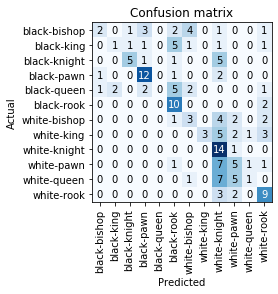

In [19]:
easy_test_dl = learn.dls.test_dl(get_image_files(test_path_easy), 
                                 with_labels=True)

interp = ClassificationInterpretation.from_learner(learn, 
                                                  dl = easy_test_dl)

interp.print_classification_report()

interp.plot_confusion_matrix()